In [ ]:
Project Description

Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.

Dataset Attributes
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
RESTAURANT_ID: A unique ID for each restaurant.
CUISINES: The variety of cuisines that the restaurant offers.
TIME: The open hours of the restaurant.
CITY: The city in which the restaurant is located.
LOCALITY: The locality of the restaurant.
RATING: The average rating of the restaurant by customers.
VOTES: The overall votes received by the restaurant.
COST: The average cost of a two-person meal.
    
#Average cost is continuous data,this is a regression problem


In [15]:
#import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
#loading the train data
train=pd.read_excel(r"C:\Users\bee\Desktop\Data set\Data_Train.xlsx")
test=pd.read_excel(r"C:\Users\bee\Desktop\Data set\Data_Test.xlsx")

In [26]:
#first five records of train data
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [27]:
#last five records of train data
train.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [28]:
#first five records of test data
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [29]:
#last five records of train data
test.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


In [30]:
#Checking shapes of each data set
train.shape

(12690, 9)

In [31]:
test.shape

(4231, 8)

In [32]:
#Checking data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [33]:
#Checking data types
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [34]:
#checking columns of each dataset
train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [35]:
test.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [ ]:
#By checking columns we see that we have 9 similar columns with 'COST as the target variable

In [36]:
#Checking Duplicate value in train data
print("Total Duplicate Rows are",train.duplicated().sum())# 25  duplicates

Total Duplicate Rows are 25


In [37]:
#Checking Duplicate value in test data
print("Total Duplicate Rows are",test.duplicated().sum())# 1 duplicate

Total Duplicate Rows are 1


In [42]:
#Dropping duplicates
train.drop_duplicates()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [43]:
test.drop_duplicates()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [47]:
#drop irrelevant columns
#drop columns with nan values
train=train.drop("RESTAURANT_ID",axis=1)#it is a mere label and does not influence the target variable

In [48]:
test=test.drop("RESTAURANT_ID",axis=1)

In [ ]:
#check if irrelevant columns have neen removed

In [107]:
train

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [108]:
test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,53 votes


In [49]:
#Checking for train data null values
train.isnull().sum()

TITLE          0
CUISINES       0
TIME           0
CITY         112
LOCALITY      98
RATING         2
VOTES       1204
COST           0
dtype: int64

In [50]:
#Checking for test data null values
test.isnull().sum()

TITLE         0
CUISINES      0
TIME          0
CITY         35
LOCALITY     30
RATING        2
VOTES       402
dtype: int64

<Axes: >

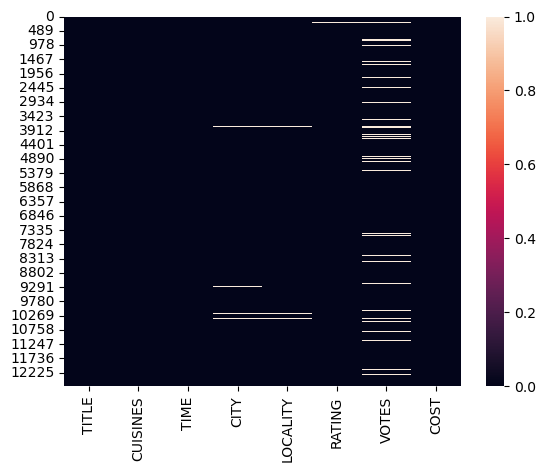

In [51]:
#checking null values using the heatmap(there are null values in the data set)
sns.heatmap(train.isnull())

<Axes: >

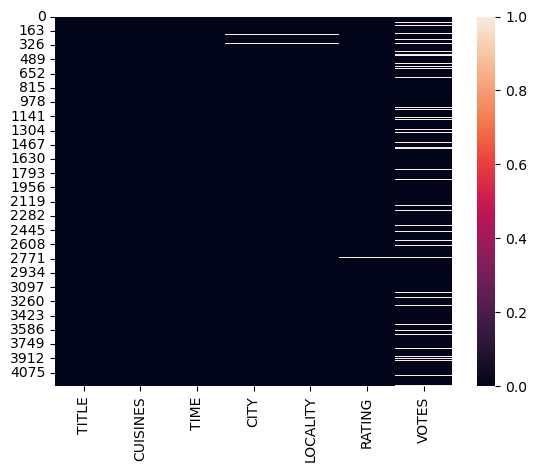

In [52]:
#checking null values using the heatmap(there are null values in the data set)
sns.heatmap(test.isnull())

In [ ]:
#in normal business practice,geographical location and rating/votes of the business influence customer perception of value hence cost of final product
#In light of the above,I will not drop the columns with null values but will fill them with column 

In [93]:
#Fill the null values for train data usnig parameter method because this is object data
train["CITY"].fillna( method ='ffill', inplace = True) 

In [94]:
train["LOCALITY"].fillna( method ='ffill', inplace = True) 

In [95]:
train["VOTES"].fillna( method ='ffill', inplace = True)

In [100]:
train["RATING"].fillna( method ='ffill', inplace = True)

In [ ]:
#Fill the null values for test data

In [96]:
test["CITY"].fillna( method ='ffill', inplace = True) 

In [97]:
test["LOCALITY"].fillna( method ='ffill', inplace = True) 

In [98]:
test["VOTES"].fillna( method ='ffill', inplace = True)

In [102]:
test["RATING"].fillna( method ='ffill', inplace = True)

In [101]:
#Checking for train data null values again
train.isnull().sum()#no null values,all null  values filled

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [103]:
test.isnull().sum()#no null values,all null  values filled

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
dtype: int64

In [ ]:
#check null values using heatmap again

<Axes: >

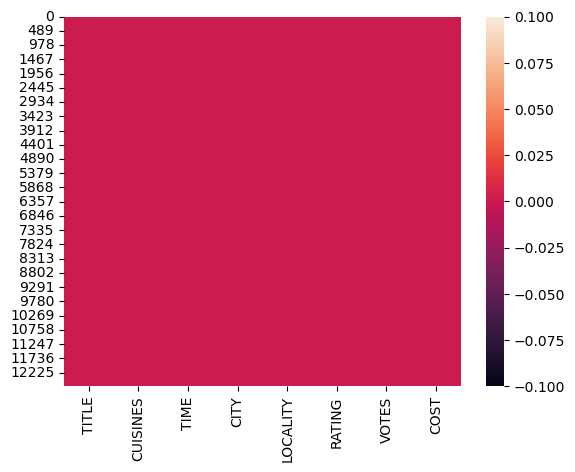

In [104]:
#checking null values using the heatmap(there are no more values in the data set)
sns.heatmap(train.isnull())

<Axes: >

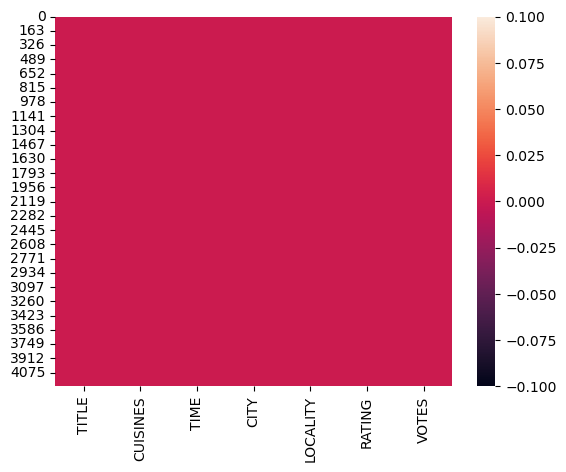

In [105]:
#checking null values using the heatmap(there are no more values in the data set)
sns.heatmap(test.isnull())

In [117]:
#checking number of unique values
train.nunique().to_frame("No. of Unique values")

,No. of Unique values
TITLE,113
CUISINES,4155
TIME,2689
CITY,359
LOCALITY,1416
RATING,32
VOTES,1847
COST,86


In [118]:
#checking number of unique values
test.nunique().to_frame("No. of Unique values")

,No. of Unique values
TITLE,86
CUISINES,1727
TIME,1183
CITY,151
LOCALITY,834
RATING,31
VOTES,1136


In [119]:
#checking the list of counts of target column.
train["COST"].unique()

array([ 1200,  1500,   800,   300,   600,  1600,   200,   900,   400,
        1400,   350,   500,   450,   700,  1000,   250,  2000,  1100,
         100,   850,  2500,  1800,   150,   650,  3500,   750,   950,
        1300,   180,  2100,   550,    50,  1900,  1750,  1350,    60,
        2200,  5000,    80,  3300,  3800,  1450,  4000,  2800,   120,
        4500,  2400,  1700,  3000,  2600,  5200, 14000,  1550,  4200,
        3700,  1150,  2700,   130,  8000,  3200,  5500,  6500,  1050,
       10000,  3600,   313,  3400,  2300,  3100,  1250,    20,  1650,
        1850,  6000,   140,  4100,  4050,  2900,   599,  7000,   299,
         370,  1950,   320,  1260,    70], dtype=int64)

In [120]:
#checking the list of counts of target column. 
train["COST"].value_counts()

300      1595
400      1357
500      1300
200      1031
600       806
         ... 
8000        1
14000       1
5200        1
80          1
70          1
Name: COST, Length: 86, dtype: int64

In [121]:
#Statistical summary of numerical columns
train.describe()

,COST
count,12690.000000
mean,655.252246
std,627.003540
min,20.000000
25%,300.000000
50%,500.000000
75%,800.000000
max,14000.000000


In [ ]:
#the mean is greater than the second percentile (median)which means the data is skewed to the right
#the huge difference between the third percentile and max values which depicts the presence of outliers
#COST is the target variable therefore we do not remove the outliers

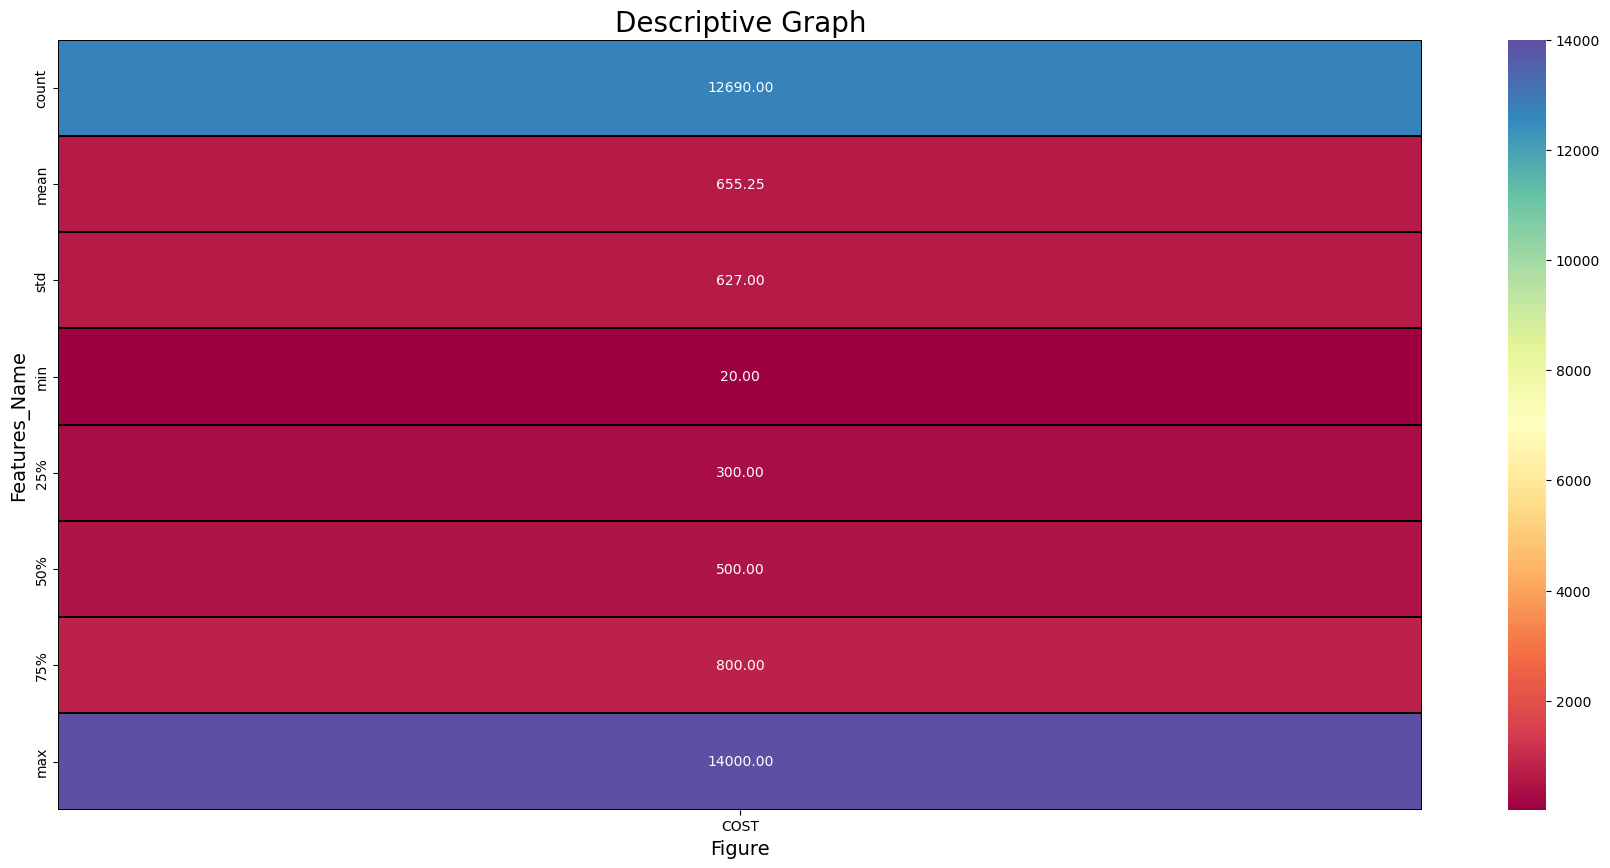

In [122]:
#Graphical view of statistical data description
plt.figure(figsize=(22,10))
sns.heatmap(train.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [ ]:
#the mean is greater than the second percentile (median)which means the data is skewed to the right
#the huge difference between the third percentile and max values which depicts the presence of outliers
#COST is the target variable therefore we do not remove the outliers

<bound method IndexOpsMixin.value_counts of 0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 12690, dtype: int64>


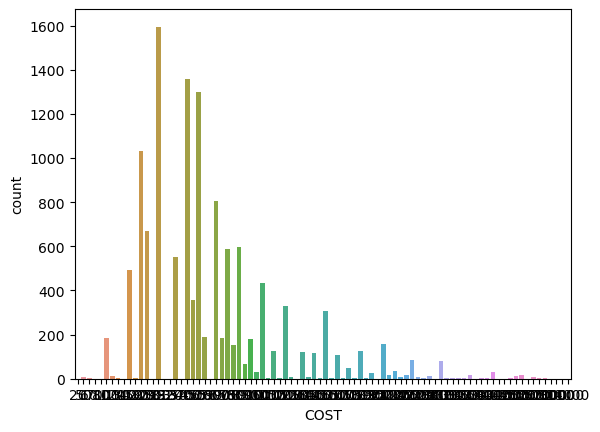

In [133]:
ax=sns.countplot(x='COST',data=train)
print(train['COST'].value_counts)

In [134]:
#Encoding categorical columns using Ordinal encorder in train data
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in train.columns:
    if train[i].dtypes=='object':
        train[i]=OE.fit_transform(train[i].values.reshape(-1,1))
train

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31.0,2627.0,739.0,320.0,285.0,17.0,1278.0,1200
1,33.0,289.0,1885.0,67.0,1046.0,23.0,950.0,1500
2,31.0,2976.0,661.0,67.0,1101.0,19.0,712.0,800
3,95.0,4130.0,275.0,222.0,136.0,22.0,787.0,800
4,50.0,1766.0,615.0,222.0,620.0,19.0,470.0,300
...,...,...,...,...,...,...,...,...
12685,95.0,2934.0,1144.0,131.0,342.0,19.0,1349.0,500
12686,33.0,2143.0,1177.0,222.0,133.0,24.0,191.0,1800
12687,71.0,2088.0,1137.0,239.0,1342.0,21.0,1428.0,1300
12688,31.0,3506.0,1837.0,67.0,631.0,16.0,996.0,400


In [137]:
#Encoding categorical columns using Ordinal encorder in test data
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in test.columns:
    if test[i].dtypes=='object':
        test[i]=OE.fit_transform(test[i].values.reshape(-1,1))
test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23.0,1293.0,503.0,110.0,662.0,23.0,823.0
1,75.0,1632.0,933.0,96.0,221.0,22.0,871.0
2,23.0,1455.0,219.0,96.0,411.0,18.0,575.0
3,66.0,208.0,1071.0,41.0,456.0,18.0,179.0
4,75.0,1637.0,208.0,78.0,300.0,16.0,394.0
...,...,...,...,...,...,...,...
4226,23.0,1425.0,103.0,108.0,597.0,19.0,487.0
4227,66.0,267.0,262.0,9.0,237.0,23.0,722.0
4228,75.0,679.0,1052.0,41.0,696.0,17.0,789.0
4229,75.0,1541.0,215.0,78.0,332.0,0.0,789.0


In [141]:
#Statistical summary of all columns after transforming object to numerical data
train.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,2235.193932,1180.084003,143.022853,655.468006,18.796612,970.233727,655.252246
std,32.762427,1204.091664,754.459944,84.060389,399.636348,6.182287,502.495369,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,1185.250000,555.000000,67.000000,337.000000,16.000000,569.000000,300.000000
50%,59.000000,2416.500000,1123.000000,131.000000,588.000000,19.000000,1021.000000,500.000000
75%,95.000000,3222.750000,1847.000000,222.000000,1010.000000,22.000000,1381.000000,800.000000
max,112.000000,4154.000000,2688.000000,358.000000,1415.000000,31.000000,1846.000000,14000.000000


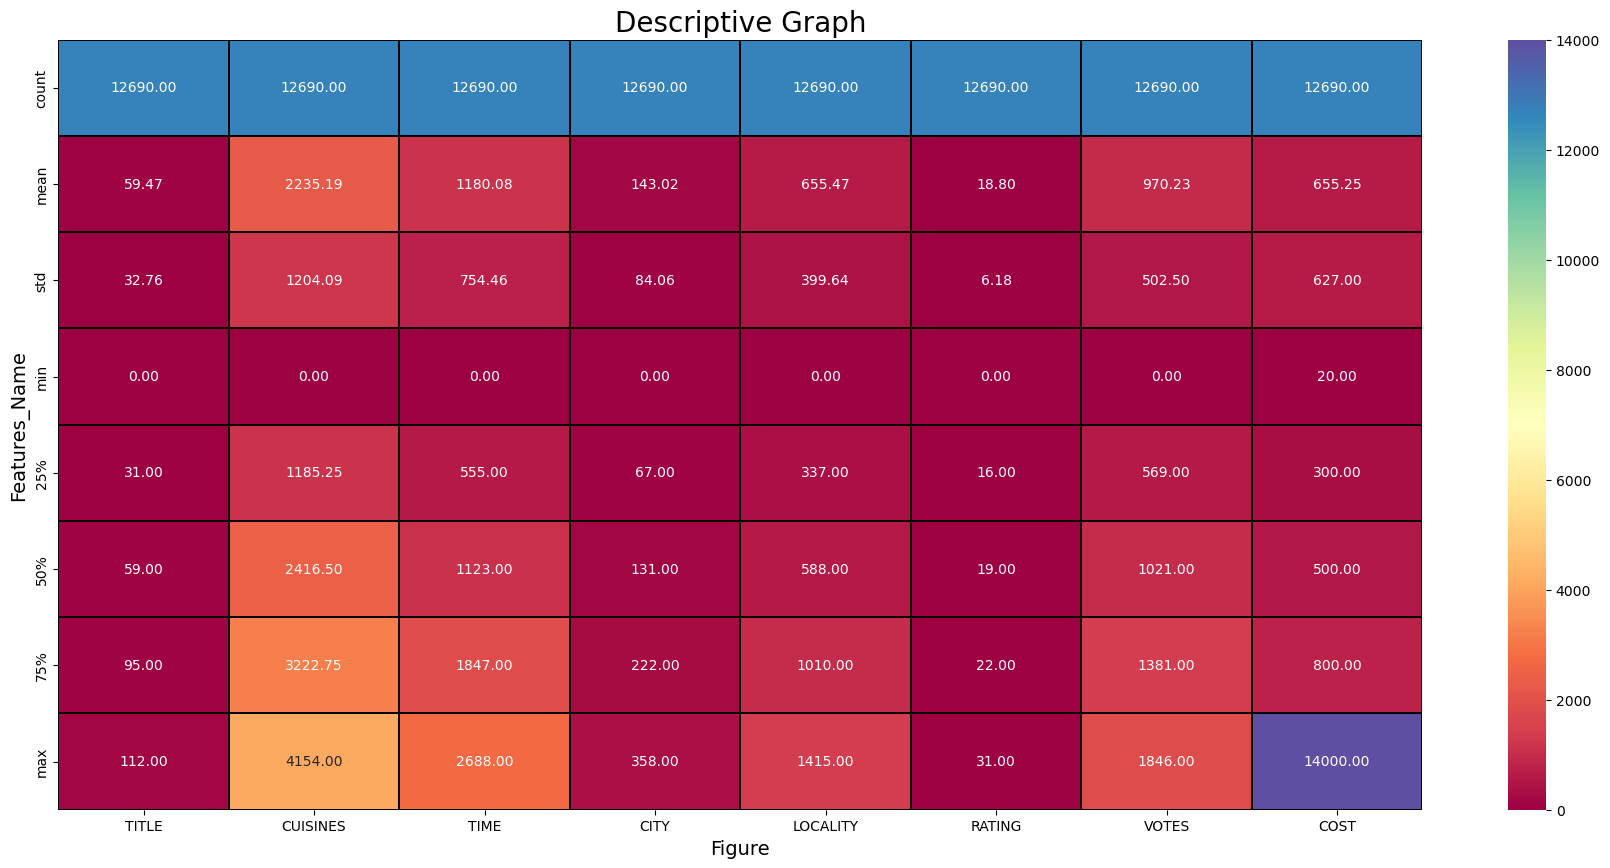

In [146]:
#Graphical view of statistical data description
plt.figure(figsize=(22,10))
sns.heatmap(train.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [ ]:
#the mean is greater than the second percentile (median) in TITLE,CITY,LOCALITY,COST which means the data is skewed to the right
#the mean is less than the second percentile (median) in CUISINES,TIME,RATING,VOTES which means the data is skewed to the left
#the huge difference between the third percentile and max values in all the columns which depicts the presence of outliers
#COST is the target variable therefore we do not remove the outliers

In [ ]:
#Bivariate Analysis

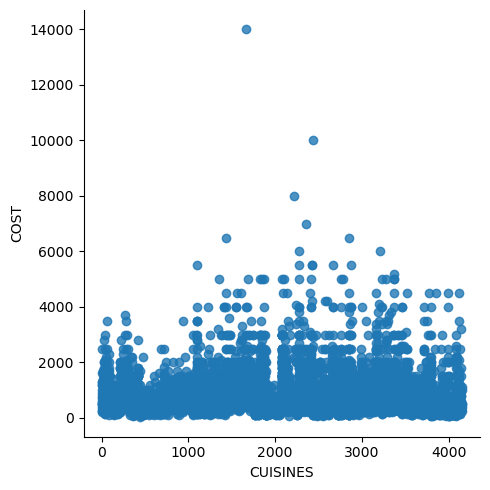

In [145]:
#Visualize using lmplot
sns.lmplot(x='CUISINES',y='COST',data=train,palette='colorblind')

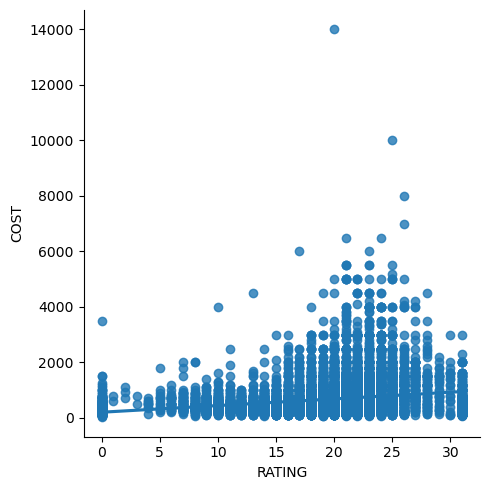

In [140]:
sns.lmplot(x='RATING',y='COST',data=train,palette='colorblind')#there appears to be an islight increse in cost when the rating goes up

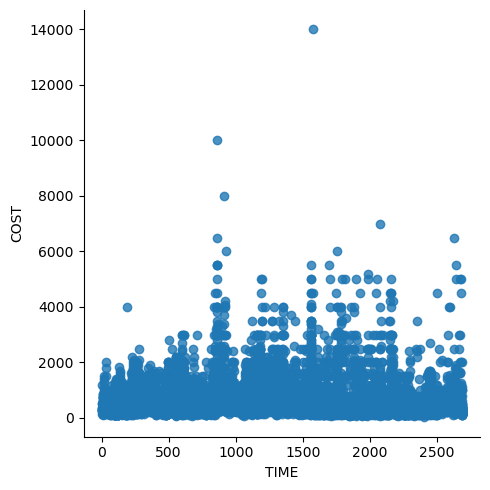

In [152]:
sns.lmplot(x='TIME',y='COST',data=train,palette='colorblind')

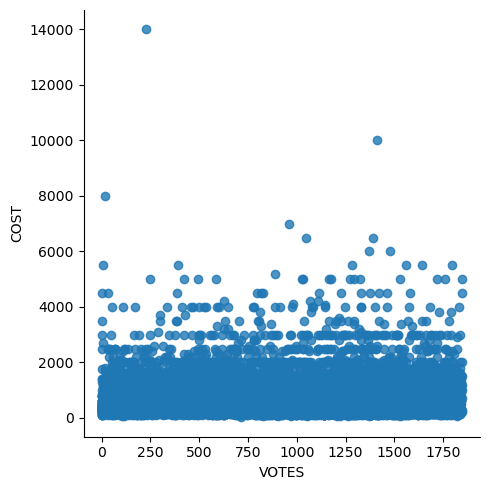

In [142]:
sns.lmplot(x='VOTES',y='COST',data=train,palette='colorblind')#the highets COST is characterised by very minimal votes.This shows that votes have limited impact on cost

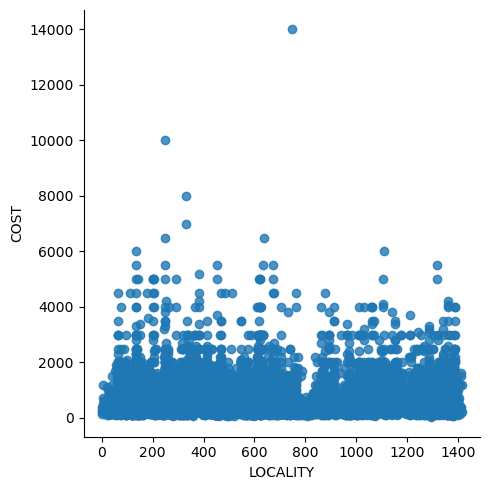

In [143]:
sns.lmplot(x='LOCALITY',y='COST',data=train,palette='colorblind')

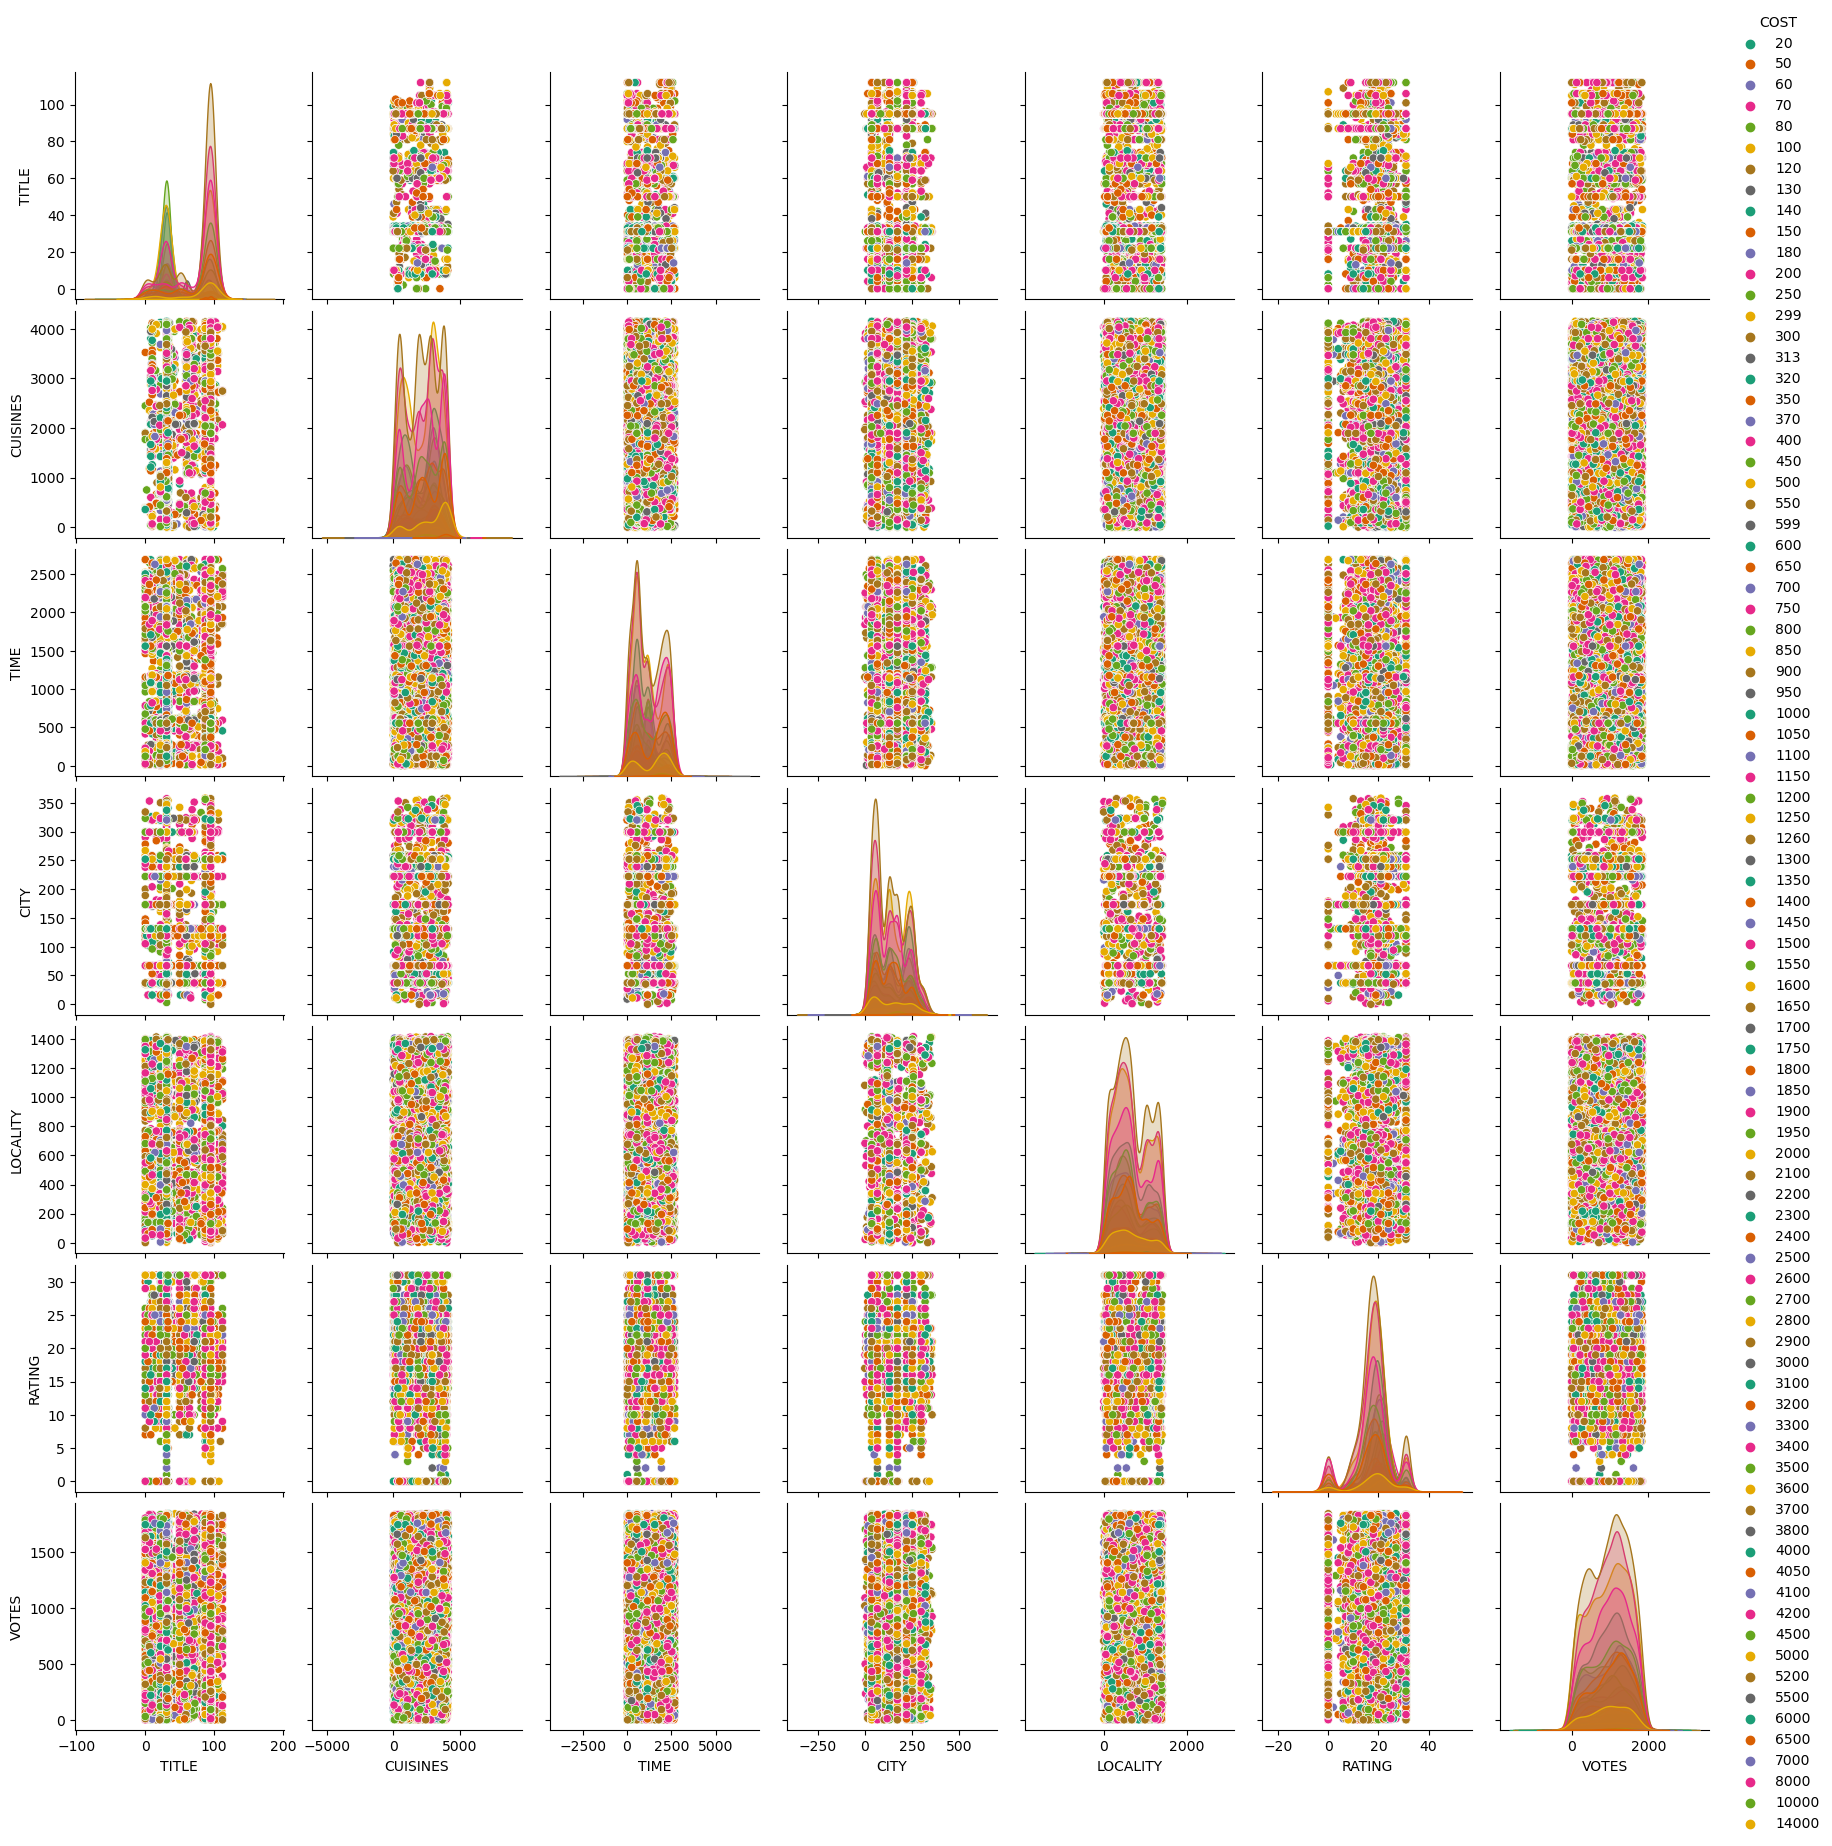

In [149]:
#Multivariate analysis
#After removing skeweness
sns.pairplot(train,hue="COST",palette="Dark2")
plt.show()

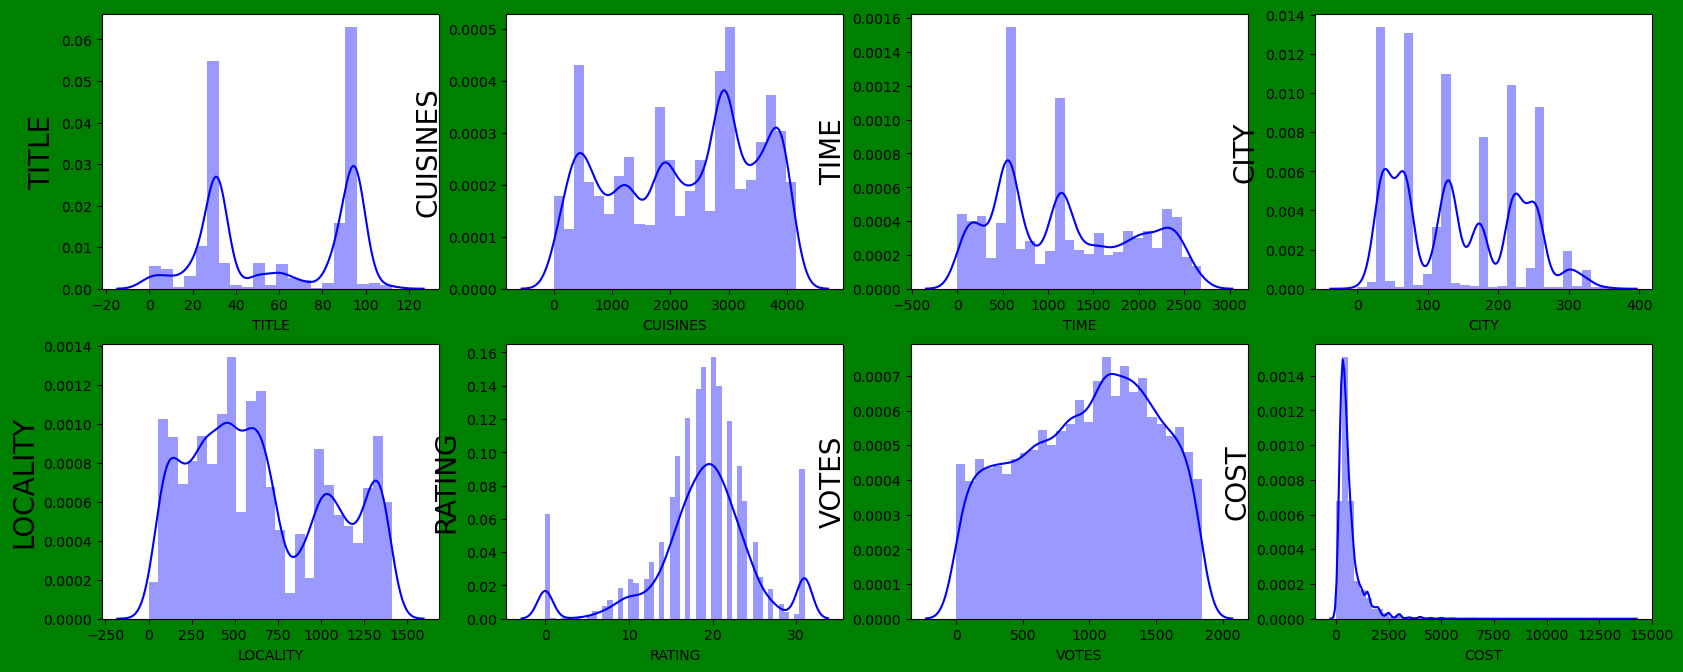

In [151]:
#checking distribution of data
plt.figure(figsize=(20,25), facecolor='green')
plotnumber = 1

for column in train:
    if plotnumber<=8:     
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(train[column],color='b')
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()#shows some normal distribution with skeweness

In [153]:
#checking the correlation between features and target
cor=train.corr()
cor

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.244866,0.053914,-0.011426,0.030874,-0.039856,0.005183,-0.263581
CUISINES,0.244866,1.000000,0.104741,0.024583,0.016005,-0.038273,-0.000036,-0.014078
TIME,0.053914,0.104741,1.000000,-0.009768,-0.005762,-0.035102,0.007554,0.018248
CITY,-0.011426,0.024583,-0.009768,1.000000,0.038665,0.027753,0.002365,0.042248
LOCALITY,0.030874,0.016005,-0.005762,0.038665,1.000000,-0.021672,0.002196,-0.016347
RATING,-0.039856,-0.038273,-0.035102,0.027753,-0.021672,1.000000,0.005581,0.236855
VOTES,0.005183,-0.000036,0.007554,0.002365,0.002196,0.005581,1.000000,0.003484
COST,-0.263581,-0.014078,0.018248,0.042248,-0.016347,0.236855,0.003484,1.000000


<Axes: >

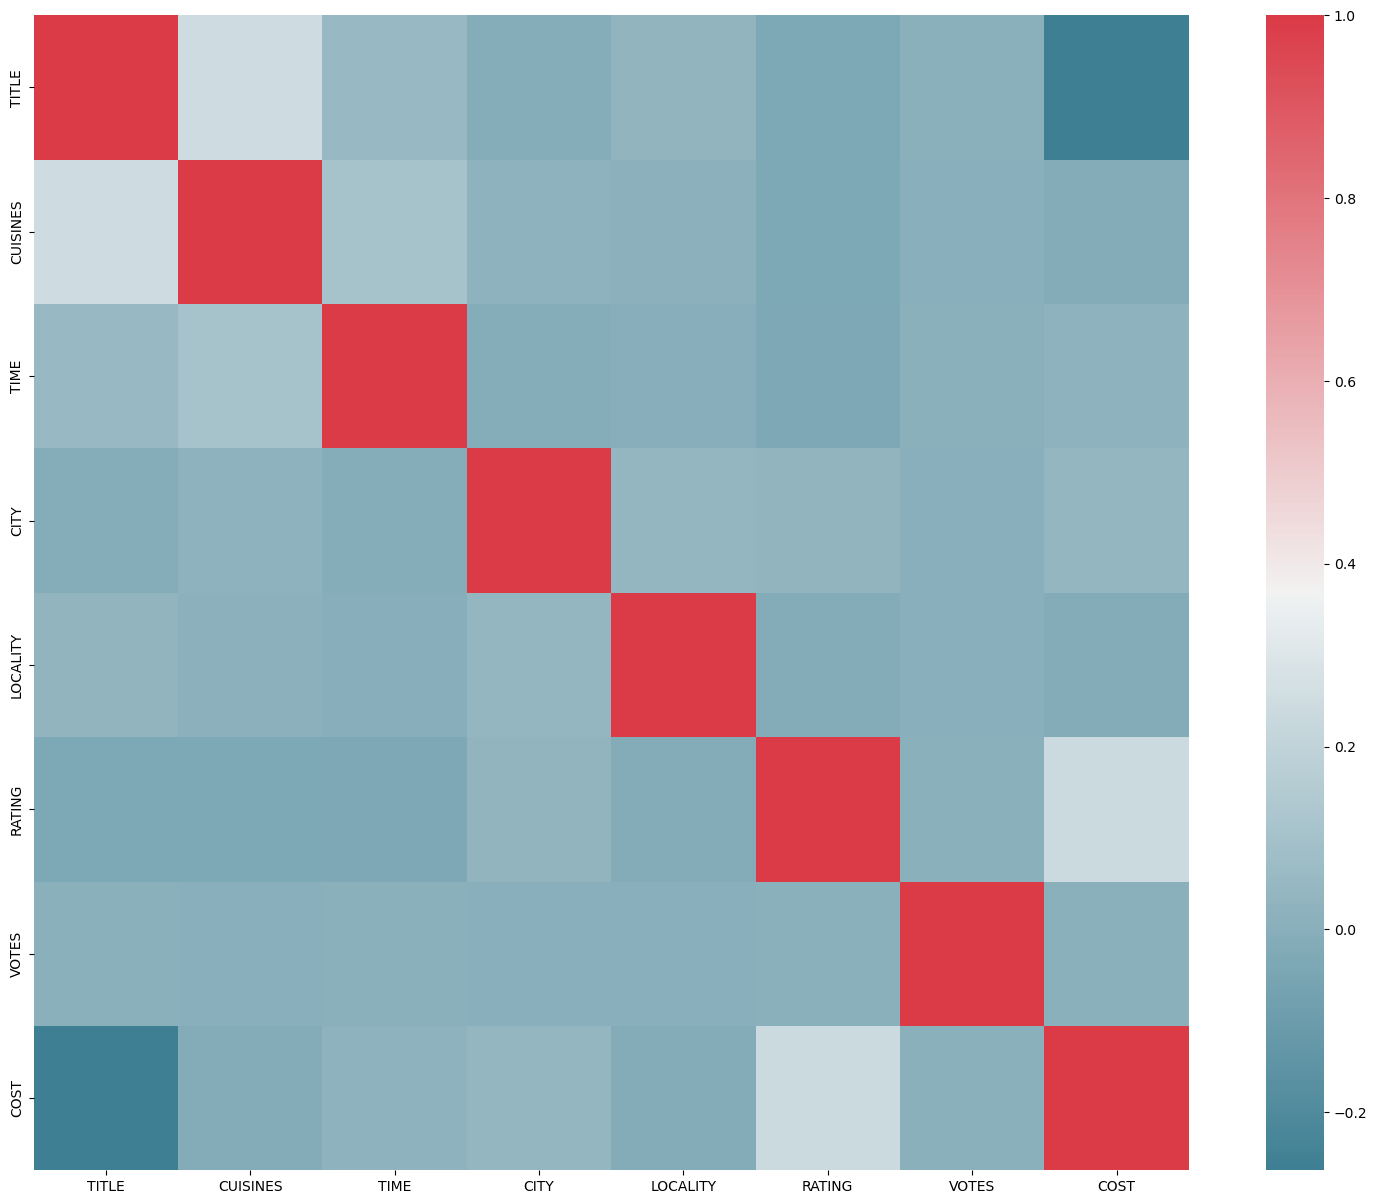

In [154]:
#Visualizing the correlation matrix byplotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

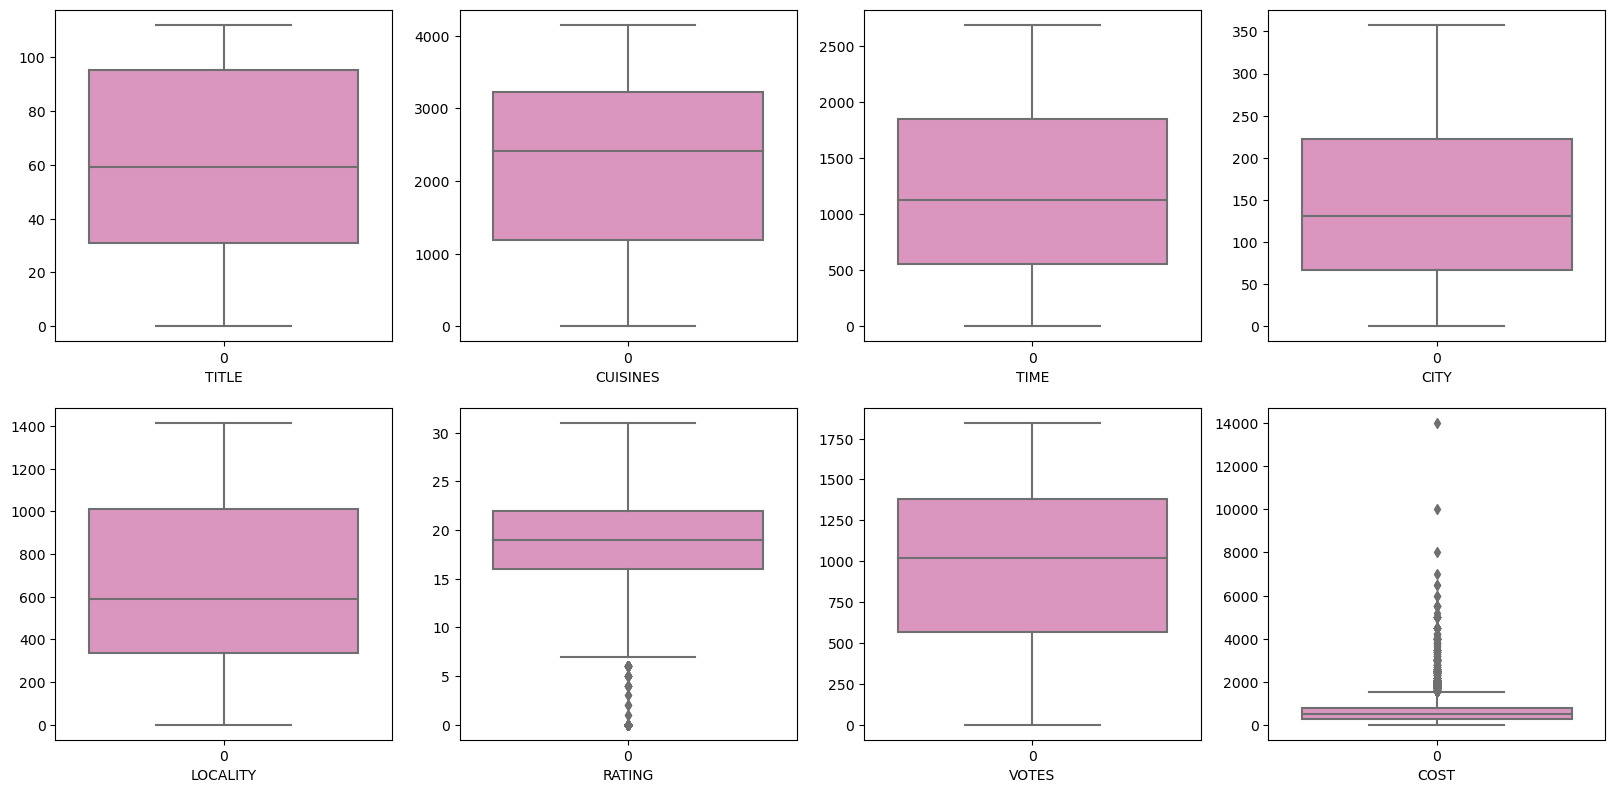

In [155]:
#Checking outliers using boxplot-
plt.figure(figsize=(20,25))
p=1
for i in train:
    if p<=8:
        plt.subplot(5,4,p)
        sns.boxplot(train[i], palette ="Set2_r")
        plt.xlabel(i)
        
    p+=1
    
plt.show()

In [158]:
#Remove outliers using zscore method and Inter quartile range method then compare the two
from scipy.stats import zscore
out_features=train[['TITLE','CUISINES','TIME','CITY','LOCALITY','RATING','VOTES']]
z=np.abs(zscore(out_features))
z

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,0.868887,0.325408,0.584658,2.105440,0.927049,0.290618,0.612500
1,0.807839,1.616381,0.934369,0.904419,0.977257,0.679935,0.040268
2,0.868887,0.615265,0.688048,0.904419,1.114887,0.032900,0.513923
3,1.084647,1.573701,1.199692,0.939566,1.299903,0.518176,0.364662
4,0.288931,0.389682,0.749021,0.939566,0.088754,0.032900,0.995538
...,...,...,...,...,...,...,...
12685,1.084647,0.580382,0.047829,0.143032,0.784414,0.032900,0.753800
12686,0.807839,0.076570,0.004088,0.939566,1.307410,0.841694,1.550789
12687,0.352072,0.122250,0.057108,1.141809,1.717959,0.356418,0.911022
12688,0.868887,1.055448,0.870745,0.904419,0.061228,0.452377,0.051279


In [159]:
#threshold
np.where (z>3)

(array([   13,    85,   156,   178,   235,   253,   329,   369,   374,
          392,   396,   428,   438,   452,   453,   455,   473,   480,
          508,   577,   604,   615,   625,   644,   690,   749,   751,
          772,   787,   831,   838,   874,   911,   919,   949,   981,
          993,   994,  1009,  1054,  1126,  1196,  1205,  1227,  1287,
         1297,  1365,  1366,  1468,  1472,  1502,  1543,  1555,  1581,
         1596,  1597,  1635,  1696,  1701,  1711,  1748,  1764,  1792,
         1806,  1839,  1855,  1884,  1903,  1983,  2025,  2039,  2053,
         2082,  2092,  2096,  2109,  2115,  2124,  2251,  2254,  2313,
         2327,  2407,  2434,  2439,  2479,  2495,  2500,  2546,  2572,
         2589,  2595,  2602,  2613,  2633,  2656,  2704,  2737,  2746,
         2765,  2892,  2908,  2910,  2930,  2950,  2960,  2967,  2979,
         2998,  3023,  3063,  3093,  3110,  3111,  3142,  3150,  3232,
         3246,  3275,  3281,  3391,  3417,  3418,  3428,  3437,  3453,
      

In [160]:
z.iloc[156,5]

3.0405177425471455

In [161]:
#removing the data above zscore and creating new dataframe
train1=train[(z<3).all(axis=1)]
train1.shape

(12195, 8)

In [162]:
#shape of old and new dataframe
print("Old Data Frame-",train.shape[0])
print("New Data Frame-",train1.shape[0])

Old Data Frame- 12690
New Data Frame- 12195


In [163]:
print("Data Loss Percentage-",((train.shape[0]-train1.shape[0])/train.shape[0])*100)

Data Loss Percentage- 3.900709219858156


In [164]:
train1

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31.0,2627.0,739.0,320.0,285.0,17.0,1278.0,1200
1,33.0,289.0,1885.0,67.0,1046.0,23.0,950.0,1500
2,31.0,2976.0,661.0,67.0,1101.0,19.0,712.0,800
3,95.0,4130.0,275.0,222.0,136.0,22.0,787.0,800
4,50.0,1766.0,615.0,222.0,620.0,19.0,470.0,300
...,...,...,...,...,...,...,...,...
12685,95.0,2934.0,1144.0,131.0,342.0,19.0,1349.0,500
12686,33.0,2143.0,1177.0,222.0,133.0,24.0,191.0,1800
12687,71.0,2088.0,1137.0,239.0,1342.0,21.0,1428.0,1300
12688,31.0,3506.0,1837.0,67.0,631.0,16.0,996.0,400


In [165]:
#Removing outliers using the interquartile range method
#1st quartile
Q1=out_features.quantile(0.25) 

#3rd quartile
Q3=out_features.quantile(0.75)

#IQR
IQR=Q3-Q1
train2=train[~((train<(Q1-1.5*IQR))|(train>(Q3+1.5*IQR))).any(axis=1)]
train2.shape

(12128, 8)

In [167]:
print("Data Loss Percentage-",((train.shape[0]-train2.shape[0])/train.shape[0])*100)

Data Loss Percentage- 4.428684003152088


In [ ]:
#I will choose the z score method because it is resulting in less data loss

In [168]:
train=train1

In [169]:
#check for skewness
train.skew()

TITLE      -0.071610
CUISINES   -0.219339
TIME        0.328629
CITY        0.279764
LOCALITY    0.328137
RATING      0.120424
VOTES      -0.187270
COST        3.941340
dtype: float64

In [ ]:
#we can see that skeweness is within the acceptable range of -0.5 and 0.5 with the exception of COST column which is the target variable.
#we do not remove skeweness from target variable

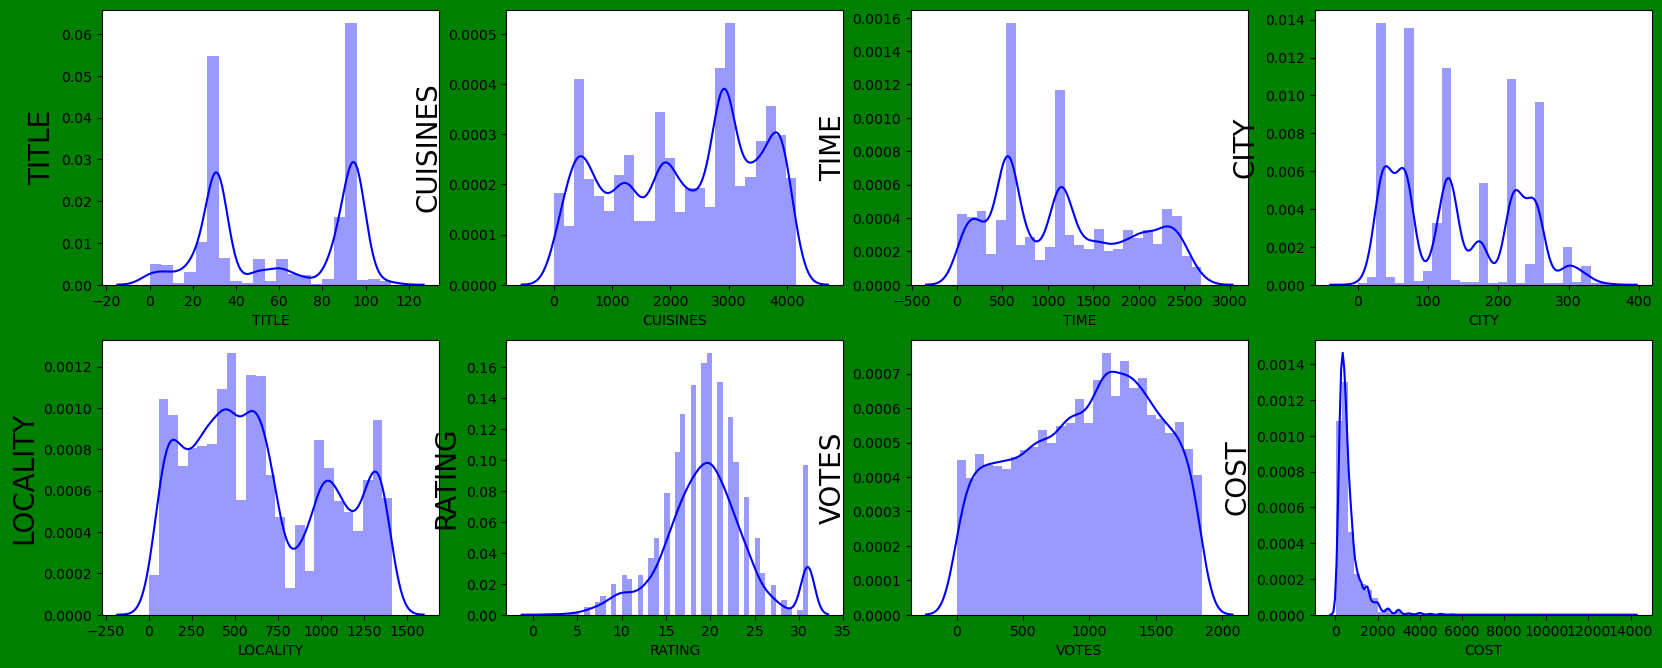

In [170]:
#checking distribution of data after removing outliers
plt.figure(figsize=(20,25), facecolor='green')
plotnumber = 1

for column in train:
    if plotnumber<=18:     
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(train[column],color='b')
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [171]:
# dividing the dataset into dependent and independent variables

x=train.drop("COST",axis = 1)
y=train["COST"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (12195, 7)
Label Dimension= (12195,)


In [172]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.878624,0.324748,-0.572530,2.084041,-0.924249,-0.513502,0.609868
1,-0.817308,-1.617743,0.966244,-0.879774,0.979054,0.690218,-0.041955
2,-0.878624,0.614709,-0.677263,-0.879774,1.116612,-0.112262,-0.514924
3,1.083471,1.573492,-1.195559,0.936002,-1.296907,0.489598,-0.365879
4,-0.296127,-0.390600,-0.739029,0.936002,-0.086396,-0.112262,-0.995841
...,...,...,...,...,...,...,...
12190,1.083471,0.579814,-0.028723,-0.130034,-0.781689,-0.112262,0.750963
12191,-0.817308,-0.077376,0.015588,0.936002,-1.304410,0.890838,-1.550288
12192,0.347686,-0.123072,-0.038122,1.135151,1.719367,0.288978,0.907957
12193,-0.878624,1.055051,0.901793,-0.879774,-0.058884,-0.714122,0.049459


In [173]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.068644,TITLE
1,1.074511,CUISINES
2,1.015890,TIME
3,1.009096,CITY
4,1.003136,LOCALITY
5,1.015248,RATING
6,1.000119,VOTES


In [ ]:
#VIF values are very minimal,there is no need to drop any column on that basis

In [174]:
#Modelling
#Import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [175]:
#Creating train test split
#Finding the best random state

maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at random_state",maxRS)

Maximum r2 score is  0.1453586130370268 at random_state 79


In [177]:
#Import Regression algorithms

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [178]:
#checking accuracy of Linear Regression

LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.12182632661497039
R2_score on training data: 11.827001208044784
Mean Absolute Error:- 350.6999744271323
Mean Squared Error:- 339566.2556414588
Root Mean Squared Error:- 582.7231380694084


In [179]:
#checking accuracy of RandomForestRegressor

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.7030053315578062
R2_score on training data: 95.56218814955496
Mean Absolute Error:- 194.80040994807322
Mean Squared Error:- 114839.88938048648
Root Mean Squared Error:- 338.8803467014375


In [180]:
#checking accuracy of KNN Model

knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.3661368099095187
R2_score on training data: 59.11356104298593
Mean Absolute Error:- 284.08248155233673
Mean Squared Error:- 245097.9305930582
Root Mean Squared Error:- 495.0736617848481


In [181]:
#checking accuracy of the Gradient Boosting Regressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.7031957706825666
R2_score on training data: 72.57508947983942
Mean Absolute Error:- 204.93933665878959
Mean Squared Error:- 114766.25166794469
Root Mean Squared Error:- 338.7716807348936


In [184]:
#checking accuracy of the Lasso Regressor

lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.12212295980950805
R2_score on training data: 11.825196745683886
Mean Absolute Error:- 350.4305544009838
Mean Squared Error:- 339451.5555243625
Root Mean Squared Error:- 582.6247124216089


In [182]:
#checking accuracy of the Ridge Regressor

rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.12182694016397033
R2_score on training data: 11.827001036724937
Mean Absolute Error:- 350.69862100316084
Mean Squared Error:- 339566.0183984818
Root Mean Squared Error:- 582.7229345053117


In [183]:
#checking accuracy of the Decision Tree Regressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.4321181234507948
R2_score on training data: 100.0
Mean Absolute Error:- 263.6977316206614
Mean Squared Error:- 219584.72260180378
Root Mean Squared Error:- 468.5986796842302


In [185]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [186]:
#Checking CV score for Linear Regressor
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_LR)-score.mean())

[0.10343996 0.10840595 0.13809554 0.11678447 0.13162697]
0.11967057821006147
Difference between R2 score and cross validation score is - 0.002155748404908925


In [187]:
#Checking CV score for Random Forest Regressor
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_RFR)-score.mean())

[0.64899146 0.70701271 0.72652273 0.71545962 0.76415074]
0.7124274528473495
Difference between R2 score and cross validation score is - -0.00942212128954334


In [188]:
#Checking CV score for KNN model
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_knn)-score.mean())

[0.34041092 0.43433602 0.34341071 0.36125342 0.43053416]
0.38198904687049207
Difference between R2 score and cross validation score is - -0.015852236960973376


In [189]:
#Checking CV score for Gradient Boosting Regressor model
score=cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_GBR)-score.mean())

[0.63046258 0.71881626 0.71285361 0.70968834 0.73226766]
0.7008176904323808
Difference between R2 score and cross validation score is - 0.00237808025018571


In [190]:
#Checking CV score for Lasso Regressor model
score=cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_lasso)-score.mean())

[0.10371714 0.10854358 0.13807294 0.11681435 0.13177528]
0.11978465682100906
Difference between R2 score and cross validation score is - 0.0023383029884989914


In [191]:
#Checking CV score for Ridge Regressor model
score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_rd)-score.mean())

[0.10344072 0.10840602 0.13809578 0.11678495 0.13162603]
0.11967070122370478
Difference between R2 score and cross validation score is - 0.0021562389402655507


In [192]:
#Checking CV score for Decision tree regressor model
score=cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_dtr)-score.mean())

[0.47448972 0.32189345 0.49082616 0.46398049 0.4216121 ]
0.43456038559706267
Difference between R2 score and cross validation score is - -0.0024422621462678595


In [ ]:
#Model Selected is Linear Regressor with the least difference between r2 score and cross validation

In [ ]:
#There are no hyperparameters for tuning on Linear Regression